## Minimal notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

import seaborn as sns

from collections import Counter
import itertools

from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import database

In [4]:
# always use False
LOCAL = False

if LOCAL:
    f = open('data/inspire_LA.json','r')
    df = json.load(f)
    f.close()
else:
    r = requests.get('https://github.com/restrepo/inspireauth/raw/main/data/inspire_LA.json')
    df = r.json()

db_master = pd.DataFrame(df)
db_master.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors
0,H.Albrecht.1,Venezuela,"[{'value': 'hartwig.albrecht@desy.de', 'curren...","Albrecht, Hermann","[{'value': 'H.Albrecht.1', 'schema': 'INSPIRE ...","Unlisted, VE",912061,"{'value': 'Albrecht, Hartwig', 'preferred_name...","[{'recid': 2023395, 'year': '2021', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1018731,[]
1,D.M.B.R.1,Venezuela,None,"Bellorin, David","[{'value': 'D.M.B.R.1', 'schema': 'INSPIRE BAI'}]","Unlisted, VE",912061,"{'value': 'R., David M. Bellorin'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023397,[]
2,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[]
3,R.Gaitan.2,Venezuela,"[{'value': 'rgaitan@uc.edu.ve', 'current': Fal...","Dominguez, Yessica","[{'value': 'R.Gaitan.2', 'schema': 'INSPIRE BA...","Unlisted, VE",912061,"{'value': 'Gaitan, Rolando', 'preferred_name':...","[{'recid': 1863076, 'year': '2021', 'citation_...","[{'rank': 'PHD', 'record': {'$ref': 'https://i...",1864347,[]
4,J.Ntahompagaze.1,Rwanda,None,"Ntahompagaze, Joseph","[{'value': 'J.Ntahompagaze.1', 'schema': 'INSP...","EAIFR, Kigali",1636656,"{'value': 'Ntahompagaze, Joseph'}","[{'recid': 2087212, 'year': '2022', 'citation_...",None,2087213,[]


# All countries in the database

In [5]:
# find all countries in json
all_countries = db_master['country'].unique()
# get rid of Nonetypes in the database
all_countries = [country for country in all_countries if country is not None]
# sort countries 
all_countries.sort()

print(len(all_countries))

for country in all_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

115
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei Darussalam
Bulgaria
Canada
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Georgia
Germany
Ghana
Greece
Guatemala
Holy See (Vatican City State)
Honduras
Hungary
Iceland
India
Indonesia
Iran, Islamic Republic of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Korea, Republic of
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lithuania
Luxembourg
Madagascar
Malaysia
Malta
Mexico
Moldova
Mongolia
Montenegro
Morocco
Netherlands
New Zealand
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Palestine, State of
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russian Federation
Rwanda
Saudi Arabia
Serbia and Montenegro
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Sweden
Switzerland
Syrian Arab Republic
Taiwan

# Latin American countries 

In [6]:
# 19 Latin American countries indexed in the database
LA_countries = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Cuba',
    'Dominican Republic', # new
    'Ecuador',
    'El Salvador', # new
    'Guatemala',
    'Honduras',
    'Mexico',
    'Panama', # new
    'Paraguay',
    'Peru',
    'Puerto Rico', # new
    'Uruguay',
    'Venezuela'
]

# Jamaica, Bahamas not included. 

LA_countries_format = [format_country(country) for country in LA_countries]

In [7]:
db=db_master[db_master['country']=='Chile'].reset_index(drop=True)
db.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors
0,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[]
1,M.P.Garcia.del.Moral.1,Chile,"[{'value': 'maria.garciadelmoral@uantof.cl', '...","Garcia del Moral, Maria Pilar","[{'value': '0000-0002-3329-2391', 'schema': 'O...",Antofagasta U.,907784,"{'value': 'Garcia del Moral Zabala, Maria del ...","[{'recid': 781916, 'year': '2008', 'citation_c...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",1019914,"[{'ids': [{'value': 'INSPIRE-00666347', 'schem..."
2,A.Restuccia.1,Chile,"[{'value': 'arestu@usb.ve', 'current': True}]","Restuccia, Alvaro","[{'value': 'A.Restuccia.1', 'schema': 'INSPIRE...",Antofagasta U.,907784,"{'value': 'Restuccia, Alvaro', 'preferred_name...","[{'recid': 781916, 'year': '2008', 'citation_c...",[{'record': {'$ref': 'https://inspirehep.net/a...,991923,"[{'ids': [{'value': 'INSPIRE-00130868', 'schem..."
3,C.Las.Heras.1,Chile,None,"Las Heras, C.","[{'value': 'C.Las.Heras.1', 'schema': 'INSPIRE...",Antofagasta U.,907784,"{'value': 'las Heras Gouverneur, Camilo', 'nam...","[{'recid': 1602193, 'year': '2018', 'citation_...","[{'rank': 'PHD', 'hidden': False, 'record': {'...",1834568,"[{'ids': [{'value': 'INSPIRE-00056546', 'schem..."
4,P.D.Alvarez.1,Chile,"[{'value': 'pd.alvarez.n@gmail.com', 'current'...","Alvarez, Pedro D.","[{'value': '0000-0001-8757-1700', 'schema': 'O...",Antofagasta U.,907784,"{'value': 'Alvarez, Pedro Diego', 'preferred_n...","[{'recid': 1859189, 'year': '2022', 'citation_...","[{'rank': 'POSTDOC', 'record': {'$ref': 'https...",1051781,"[{'ids': [{'value': 'INSPIRE-00328995', 'schem..."


# Calculate the collaboration matrix

In [8]:
# auxiliary function to fetch recids

def fetch_recid(papers):
    # get `recid`
    ans = [item.get('recid') for item in papers]
    # remove duplicates if the author has
    # multiple affiliations
    ans= list(dict.fromkeys(ans))
    return ans

In [10]:
def paper_ids(name_of_country: str):
    """
    Returns the list of all the 'recid'
    of the papers of a given country.
    Paramaters
    ----------
        country: str
    Returns
    -------
        ans: list
    """
    # select country 
    db=db_master[db_master['country']==name_of_country].reset_index(drop=True)
    
    # obtain nested list with the recids and getting rid
    # of double counting for a same author
    composite_list = db['papers'].apply(fetch_recid).to_list()
    
    # flatten list
    flat_list = list(itertools.chain(*composite_list))
    
    # getting rid of double counting among 
    # different authors 
    ans = list(dict.fromkeys(flat_list))
    return ans
  
    
# check internal consistency with the numbers previously found
for country in LA_countries:
    print(f'{country} = {len(paper_ids(country))}')
    

Argentina = 9920
Bolivia = 134
Brazil = 30305
Chile = 10193
Colombia = 3243
Costa Rica = 265
Cuba = 1173
Dominican Republic = 144
Ecuador = 218
El Salvador = 24
Guatemala = 204
Honduras = 25
Mexico = 14143
Panama = 4
Paraguay = 10
Peru = 1073
Puerto Rico = 97
Uruguay = 947
Venezuela = 3134


In [11]:
def shared_papers(country_1, country_2):
    recid_1 = paper_ids(country_1)
    recid_2 = paper_ids(country_2)
    shared_papers_list = list(set(recid_1).intersection(recid_2))
    return len(shared_papers_list)

In [12]:
def all_shared_papers(a_country):
    other_countries = LA_countries[LA_countries != a_country]
    ans = [shared_papers(a_country, country) for country in LA_countries]
    return ans

In [13]:
def shared_papers_matrix():
    #other_countries = LA_countries[LA_countries != a_country]
    #for country in LA_:
        #print(f'Papers {a_country}/{country} : {shared_papers(a_country, country)}')
    ans = [all_shared_papers(country) for country in LA_countries]
    return ans

collab_matrix = shared_papers_matrix()

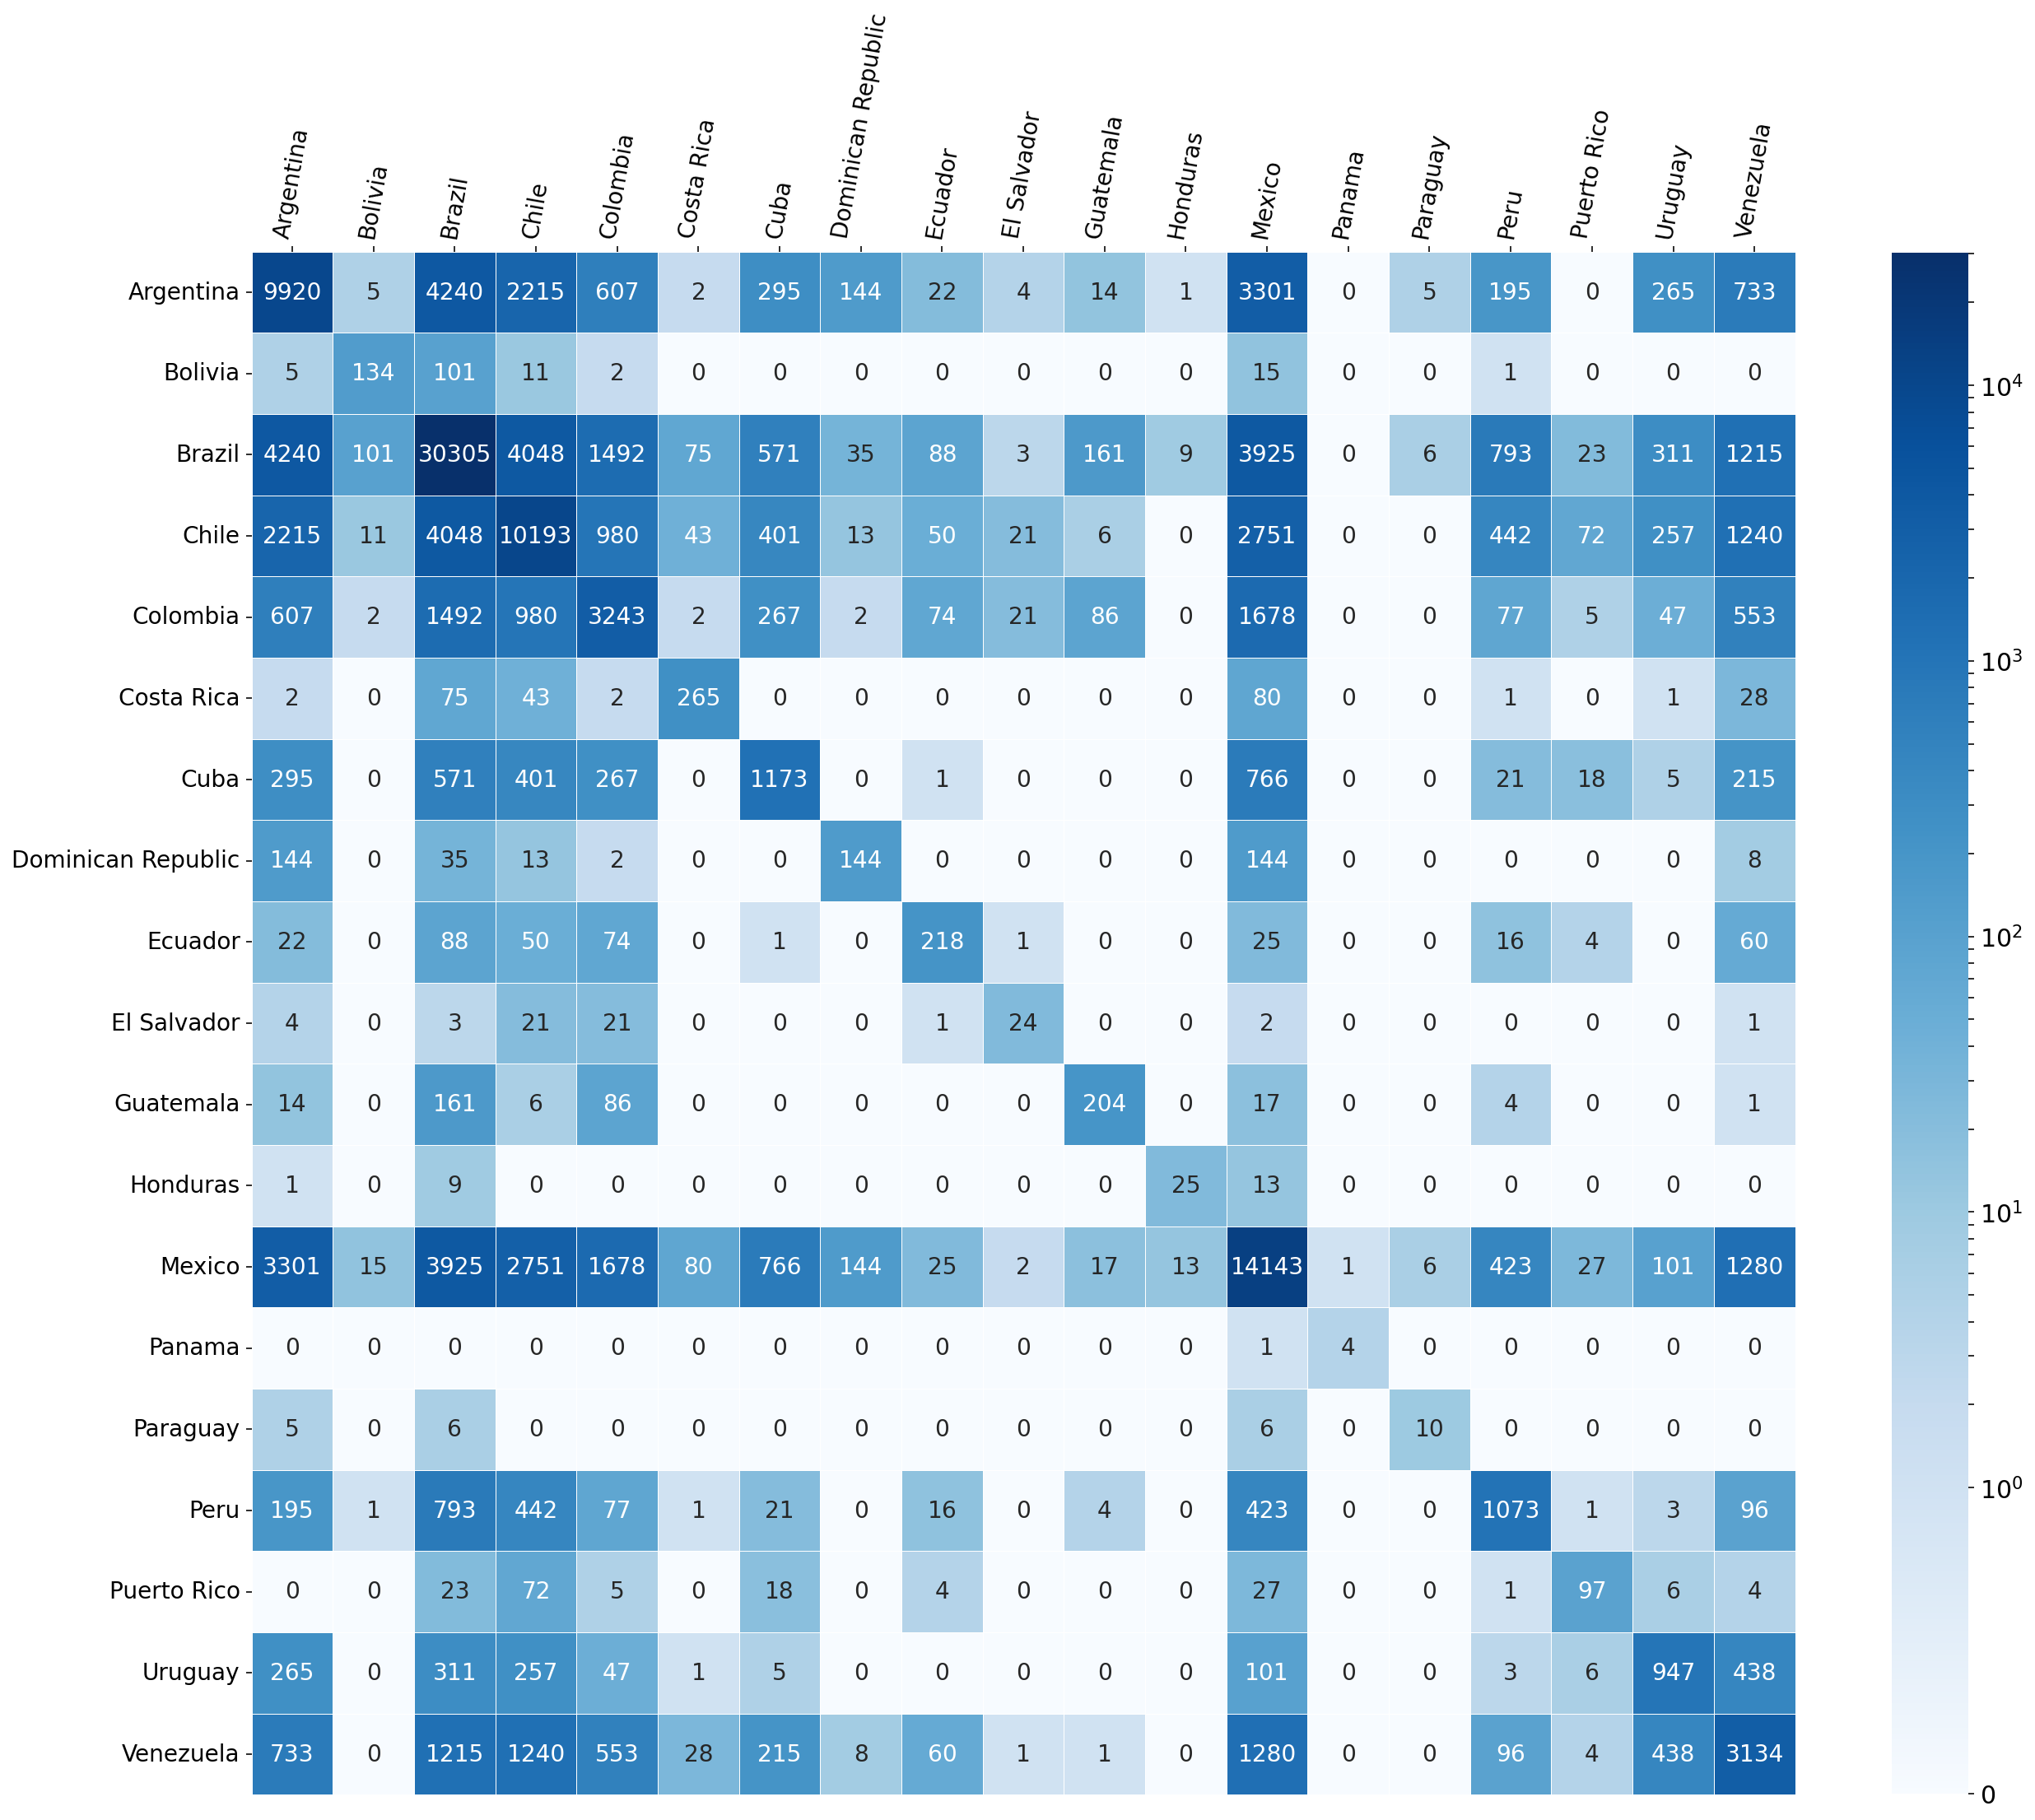

In [25]:
def gen_collab_matrix_plot(collab_matrix):
    #

    fig, ax = plt.subplots(figsize=(21,21))         # Sample figsize in inches
    ax.xaxis.tick_top() # x axis on top

    ax = sns.heatmap(collab_matrix, annot=True, fmt='.5g', cmap='Blues', norm=SymLogNorm(linthresh=1),
               linewidths=.5, annot_kws={"size":14}, square=True, cbar_kws={"shrink": 0.82})
    
    ax.collections[0].colorbar.ax.tick_params(labelsize=15)

    ax.set_xticklabels(LA_countries, rotation='80', fontsize=14)
    ax.set_yticklabels(LA_countries, rotation='horizontal', fontsize=14)


    fig.savefig(f'../figures/collaborations/collab_matrix.pdf', dpi=150, bbox_inches='tight')
    
gen_collab_matrix_plot(collab_matrix)